In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [13]:
raw_data = pd.read_csv('telecom_churn.csv')

In [17]:
df = raw_data.copy()

In [18]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [21]:
df['International plan'] = df['International plan'].map({'Yes':0,'No':1})

In [22]:
df['Voice mail plan'] = df['Voice mail plan'].map({'Yes':0,'No':1})

In [23]:
states = df.pop('State')

In [24]:
X, y = df.drop('Churn',axis = 1), df['Churn']

In [31]:
X.shape, y.shape 

((3333, 18), (3333,))

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
# split train and validation dataset (7:3)
X_train, X_holdout, y_train, y_holdout = \
     train_test_split(X, y, test_size = .3, random_state =17  )

In [34]:
X_train.shape , X_holdout.shape

((2333, 18), (1000, 18))

In [35]:
y_train.shape, y_holdout.shape

((2333,), (1000,))

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
tree = DecisionTreeClassifier(random_state = 17)

fit-predict

In [39]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=17, splitter='best')

Cross_validation

In [104]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [105]:
# progress bar
from tqdm import tqdm_notebook

In [106]:
skf = StratifiedKFold(n_splits = 5, shuffle= True, random_state = 17)

In [109]:
cv_accuracies_by_depth, ho_accuracies_by_depth = [],[]

max_depth_values = np.arange(2,11)

# for each value of max depth
for curr_max_depth in tqdm_notebook(max_depth_values):
    tree = DecisionTreeClassifier(random_state =17, max_depth = curr_max_depth)
    
    # perform cross_validation
    val_scores = cross_val_score(estimator = tree, X=X_train, y= y_train, cv = skf)
    cv_accuracies_by_depth.append(val_scores.mean())
    
    # assess the model with the holdoutset
    tree.fit(X_train,y_train)
    cuur_ho_pred = pred = tree.predict(X_holdout)
    ho_accuracies_by_depth.append(accuracy_score(y_holdout, cuur_ho_pred))

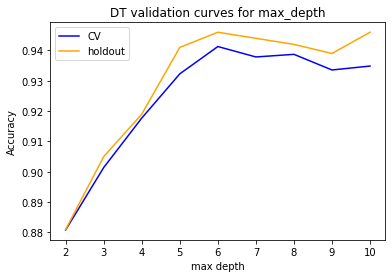

In [111]:
plt.plot(max_depth_values, cv_accuracies_by_depth, label = 'CV', c='blue')
plt.plot(max_depth_values, ho_accuracies_by_depth, label = 'holdout', c= 'orange')
plt.legend();
plt.xlabel('max depth')
plt.ylabel('Accuracy')
plt.title('DT validation curves for max_depth');

from the graph, when max_depth is 6, it shows highest accuracy.
In this case, validation(holdout) shows better accuracy than cross-validation.
Therefore, if we use validation data many times, it could cause overfitting 

In [92]:
# average of each cross_val_score
accuracies_by_depth

[0.933565540248688,
 0.933565540248688,
 0.933565540248688,
 0.933565540248688,
 0.933565540248688,
 0.933565540248688,
 0.933565540248688,
 0.933565540248688]

In [83]:
# generate 5 cross_val_score as it is 5 fold(dataset is divided into 5 and validate 5 times for each set)
val_scores=cross_val_score(estimator = tree, X=X_train, y= y_train, cv = skf)

In [84]:
val_scores.mean()

0.933565540248688

In [40]:
from sklearn.metrics import accuracy_score

In [43]:
pred_holdout = tree.predict(X_holdout)

In [46]:
pred_holdout.shape, y_holdout.shape

((1000,), (1000,))

In [47]:
accuracy_score(y_holdout, pred_holdout)

0.915

In [48]:
import numpy as np

In [49]:
y.value_counts(normalize = True)

False    0.855086
True     0.144914
Name: Churn, dtype: float64

In [55]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [56]:
params = {'max_depth': np.arange(2,11), 'min_samples_leaf': np.arange(2,11)}

In [58]:
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 17)

In [62]:
# 5-folds means we need to split the data into 5 sets and validate for each sets 
# for each grid then it will be total 81*5
best_tree=GridSearchCV(estimator = tree, param_grid = params, cv=skf)

In [64]:
best_tree.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=17,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,

In [66]:
best_tree.best_params_

{'max_depth': 6, 'min_samples_leaf': 4}

In [67]:
#gini : the lower the better model, the higher the more chaos 
best_tree.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=17, splitter='best')

 Cross-Validation assessment of model quality

In [68]:
# when max_depth is 7 and min_samples_split is 2 
best_tree.best_score_

0.9404200600085727

Holdout assessment

In [70]:
pred_holdout_better = best_tree.predict(X_holdout)

In [71]:
accuracy_score(y_holdout, pred_holdout_better)

0.94

In [120]:
# install pydotplus 
conda install -c conda-forge pydotplus

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\yunmi\Anaconda3

  added / updated specs:
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.11.28 |       hecc5488_0         182 KB  conda-forge
    certifi-2019.11.28         |           py37_0         148 KB  conda-forge
    conda-4.8.2                |           py37_0         3.0 MB  conda-forge
    graphviz-2.38.0            |    h6538335_1011        41.0 MB  conda-forge
    openssl-1.1.1d             |       hfa6e2cd_0         4.7 MB  conda-forge
    pydotplus-2.0.2            |             py_2          23 KB  conda-forge
    ------------------------------------------------------------
                                           Total:        49.1 MB

The following NEW packages will be INSTALLED:

  graphviz           conda-forge/win-64::graphviz-2.38.0

In [123]:
# for better visualization, reduce max_deapth to 3 
tree = DecisionTreeClassifier(random_state = 17, max_depth = 3).fit(X_train,y_train)

In [124]:
from sklearn.tree import export_graphviz
from io import StringIO
import pydotplus
from ipywidgets import Image

In [126]:
dot_data = StringIO()
export_graphviz(decision_tree=tree, 
               out_file= dot_data, filled=True, 
               feature_names=df.drop('Churn', axis=1).columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(value= graph.create_png())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x04\xfd\x00\x00\x01\xf1\x08\x06\x00\x00\x00\x16Y\xc9…

Blue: possibility that customers will churn 

Orange: possiblity that customers will not churn 

Conclusion: if total day minutes are more than 264.45, voice mail plan is higher than 0.5(0:yes,1:no) and total eve minutes are more than 187,75, there are high possiblity that cutomer will churn 